# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

0.47058823529411764


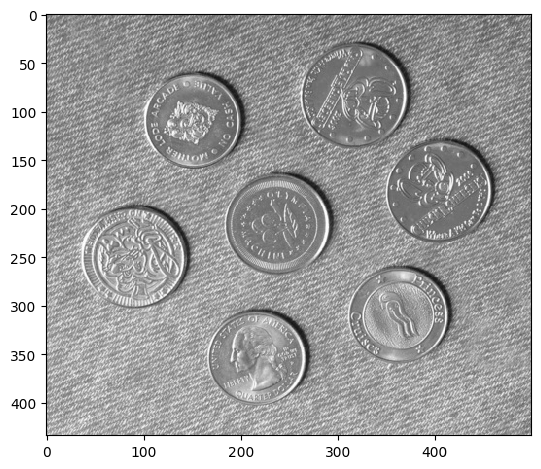

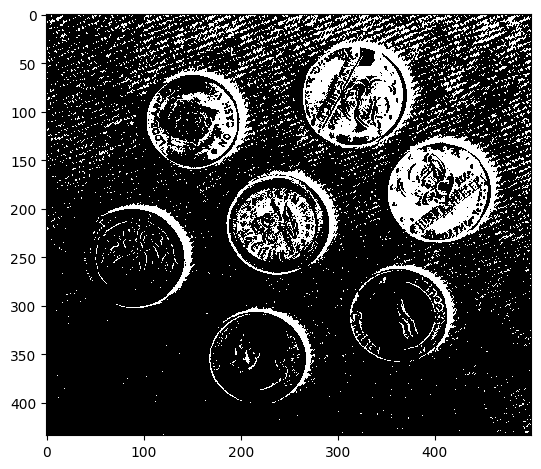

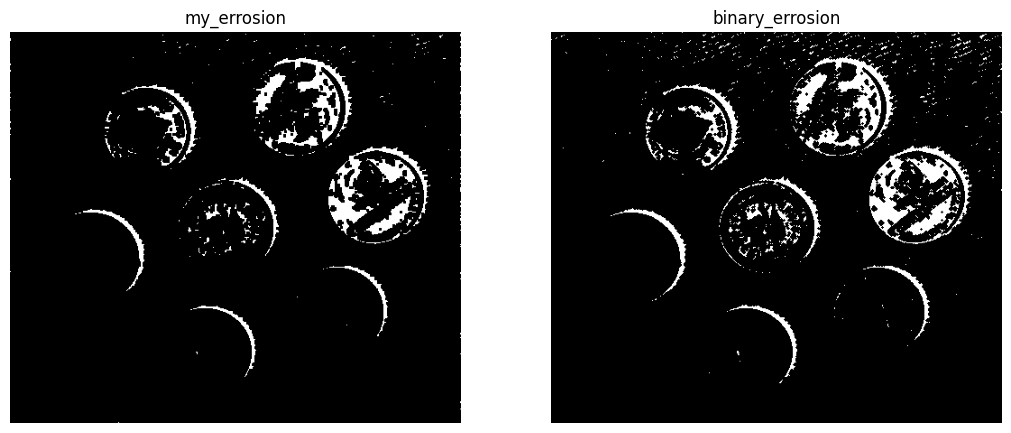

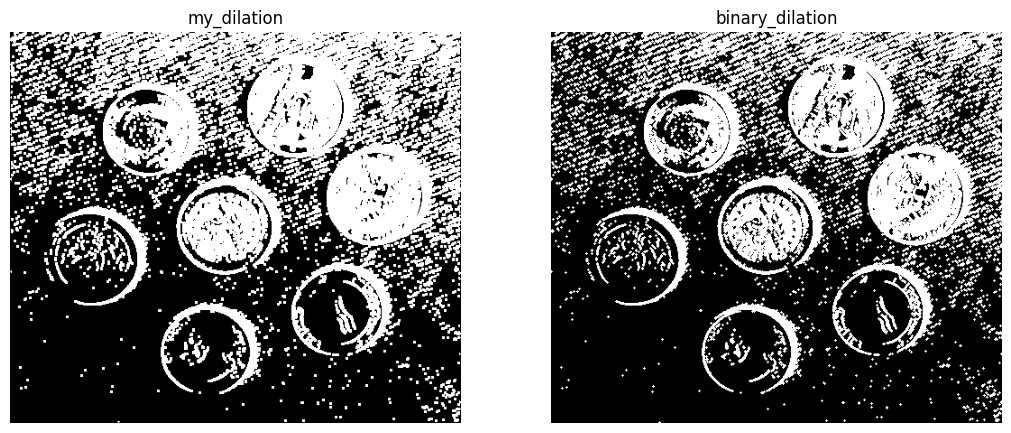

In [25]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def my_erosion(image, window_size: tuple):
    img_f = np.copy(image)


    edge_x = window_size[1]//2
    edge_y = window_size[0]//2
    img_out = np.copy(img_f)
    struct_elem = np.ones((window_size[0],window_size[1]), np.bool_)
    for x in range(edge_x, img_f.shape[1] - edge_x):
        for y in range(edge_y, img_f.shape[0] - edge_y):
            color_array = np.array(img_f[y-edge_y : y+window_size[0]-edge_y, x-edge_x : x+window_size[1]-edge_x], dtype=np.float64)
            img_out[y][x] = np.all(color_array == struct_elem)
    return img_out

def my_dilation(image, window_size: tuple):
    img_f = np.copy(image)
    edge_x = window_size[1]//2
    edge_y = window_size[0]//2
    img_out = np.copy(img_f)

    struct_elem = np.ones((window_size[0],window_size[1]), np.bool_)
    for x in range(edge_x, img_f.shape[1] - edge_x):
        for y in range(edge_y, img_f.shape[0] - edge_y):
            color_array = np.array(img_f[y-edge_y : y+window_size[0]-edge_y, x-edge_x : x+window_size[1]-edge_x], dtype=np.bool_)
            img_out[y][x] = np.any(color_array == struct_elem)
    return img_out




img = rgb2gray(io.imread('img/coins.jpg'))
thres = 120/255
print(thres)
img2 = np.ones(img.shape, dtype=np.bool_)
img2[img > thres] = False
img2[img <= thres] = True


io.imshow(img)
io.show()
io.imshow(img2)
io.show()
show_images([my_erosion(img2, (3,3)), binary_erosion(img2)], ["my_errosion", "binary_errosion"])
show_images([my_dilation(img2, (3,3)), binary_dilation(img2)], ["my_dilation", "binary_dilation"])




0.5490196078431373


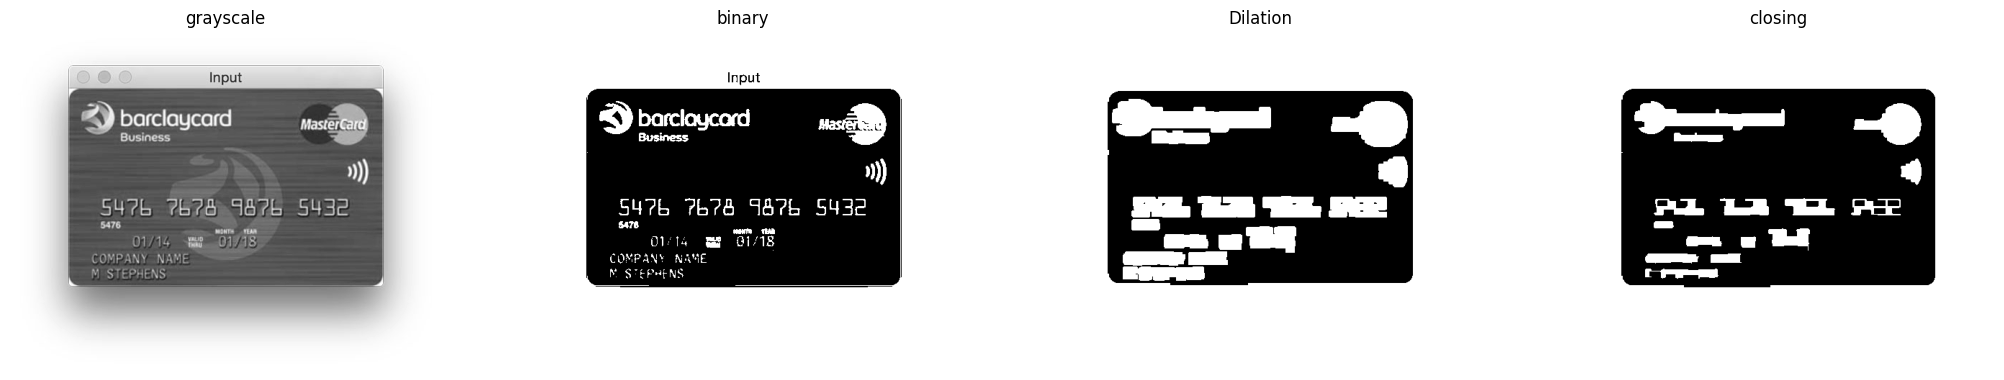

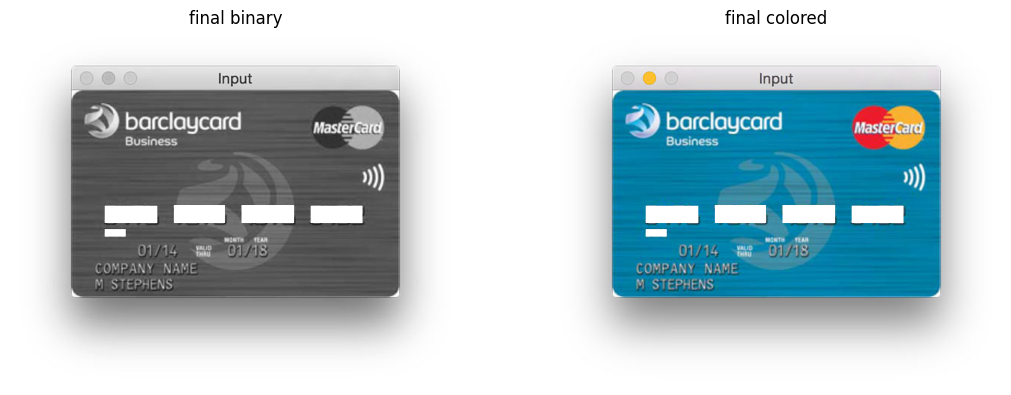

In [26]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img_colored = io.imread('img/card.jpg')
img = rgb2gray(io.imread('img/card.jpg'))

#150 -> 170
thres = 140/255
print(thres)
img2 = np.ones(img.shape, dtype=np.bool_)
img2[img < thres] = False
img2[img >= thres] = True


close1 = my_erosion(my_dilation(img2, (7,13)), (7,13))
#close2 = 
show_images([img,img2,my_dilation(img2, (7,13)),close1], ["grayscale","binary","Dilation","closing"])

cnts = find_contours(close1, 0.8)
#cnts_y = cnts[:,0]
#cntx_x = cnts[:,1]

bounding_boxes = list()
for cnt in cnts:
    min_x = int(round(min(cnt[:,1])))
    max_x = int(round(max(cnt[:,1])))
    min_y = int(round(min(cnt[:,0])))
    max_y = int(round(max(cnt[:,0])))
    if (max_y - min_y) != 0 and (max_x - min_x)/(max_y-min_y) > 2.5 and (max_x - min_x)/(max_y-min_y) < 3.5:
        bounding_boxes.append([min_x, max_x, min_y, max_y])

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img[rr, cc] = 1 #set color white
    img_colored[rr, cc] = [255, 255, 255]

show_images([img, img_colored], ["final binary", "final colored"])

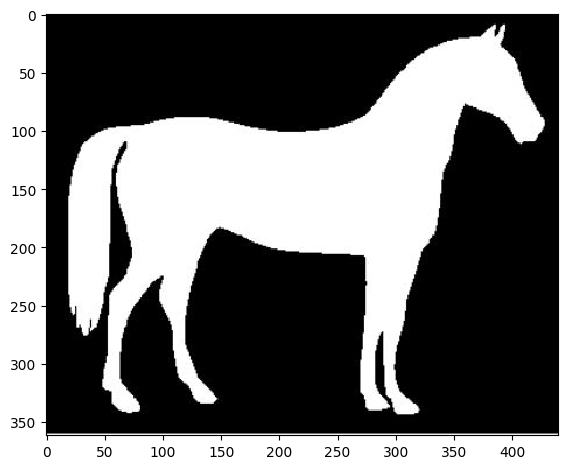

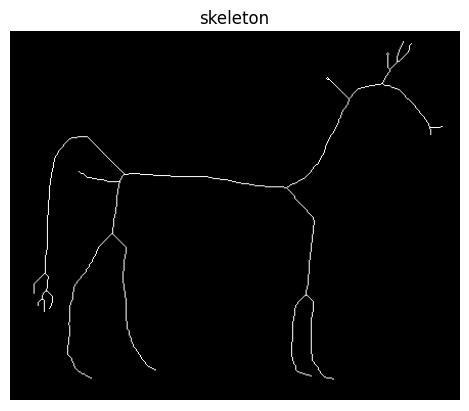

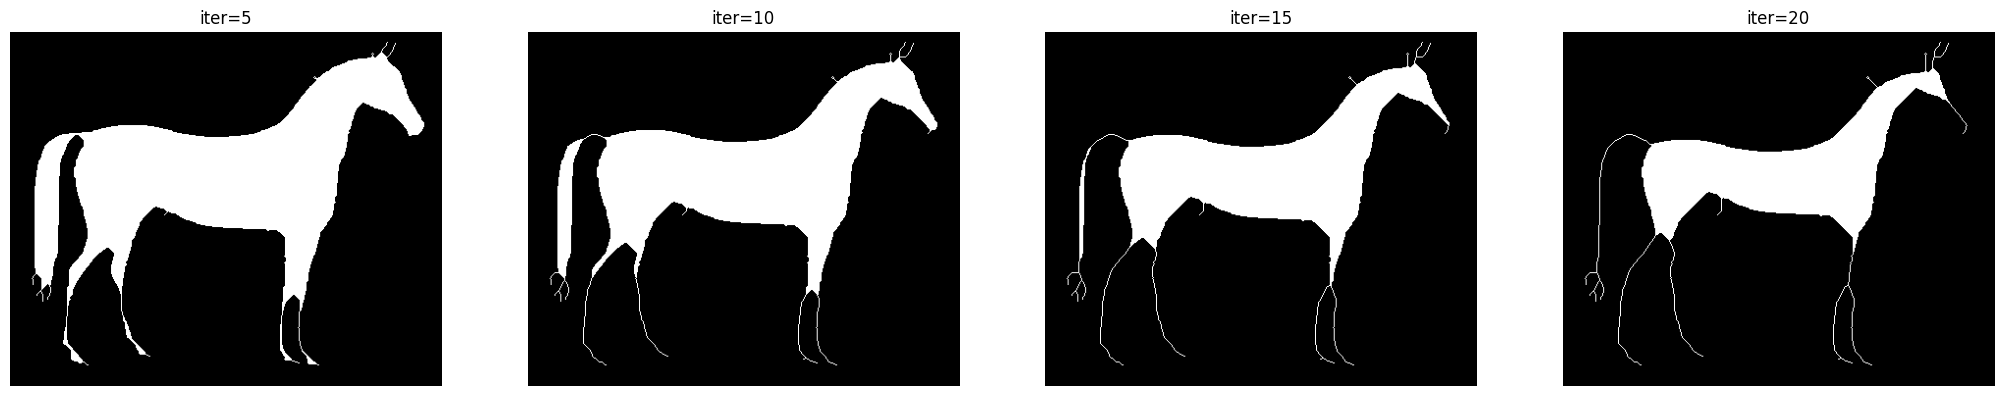

In [23]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = rgb2gray(io.imread('img/horse.jpg'))
thres = 0.9
img2 = np.ones(img.shape, dtype=np.bool_)
img2[img <= thres] = False
img2[img > thres] = True

io.imshow(io.imread('img/horse.jpg'))
io.show()
show_images([skeletonize(img2)],["skeleton"])
show_images([thin(img2, 5), thin(img2, 10), thin(img2, 15), thin(img2, 20)], ["iter=5", "iter=10", "iter=15", "iter=20"])
